In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# First Observation
data is read into pandas dataframe and the first few rows are examined

In [19]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Life Expectancy ~ Year
the life expectancy of countries throughout years are examined using seaborn facetgrid and lineplots <br>
<br>
<b>a somehow constant pattern is seen in all countries except zimbabwe with increase in life expectancy increasing from 40 to 60 from 2000 to 2024<b>

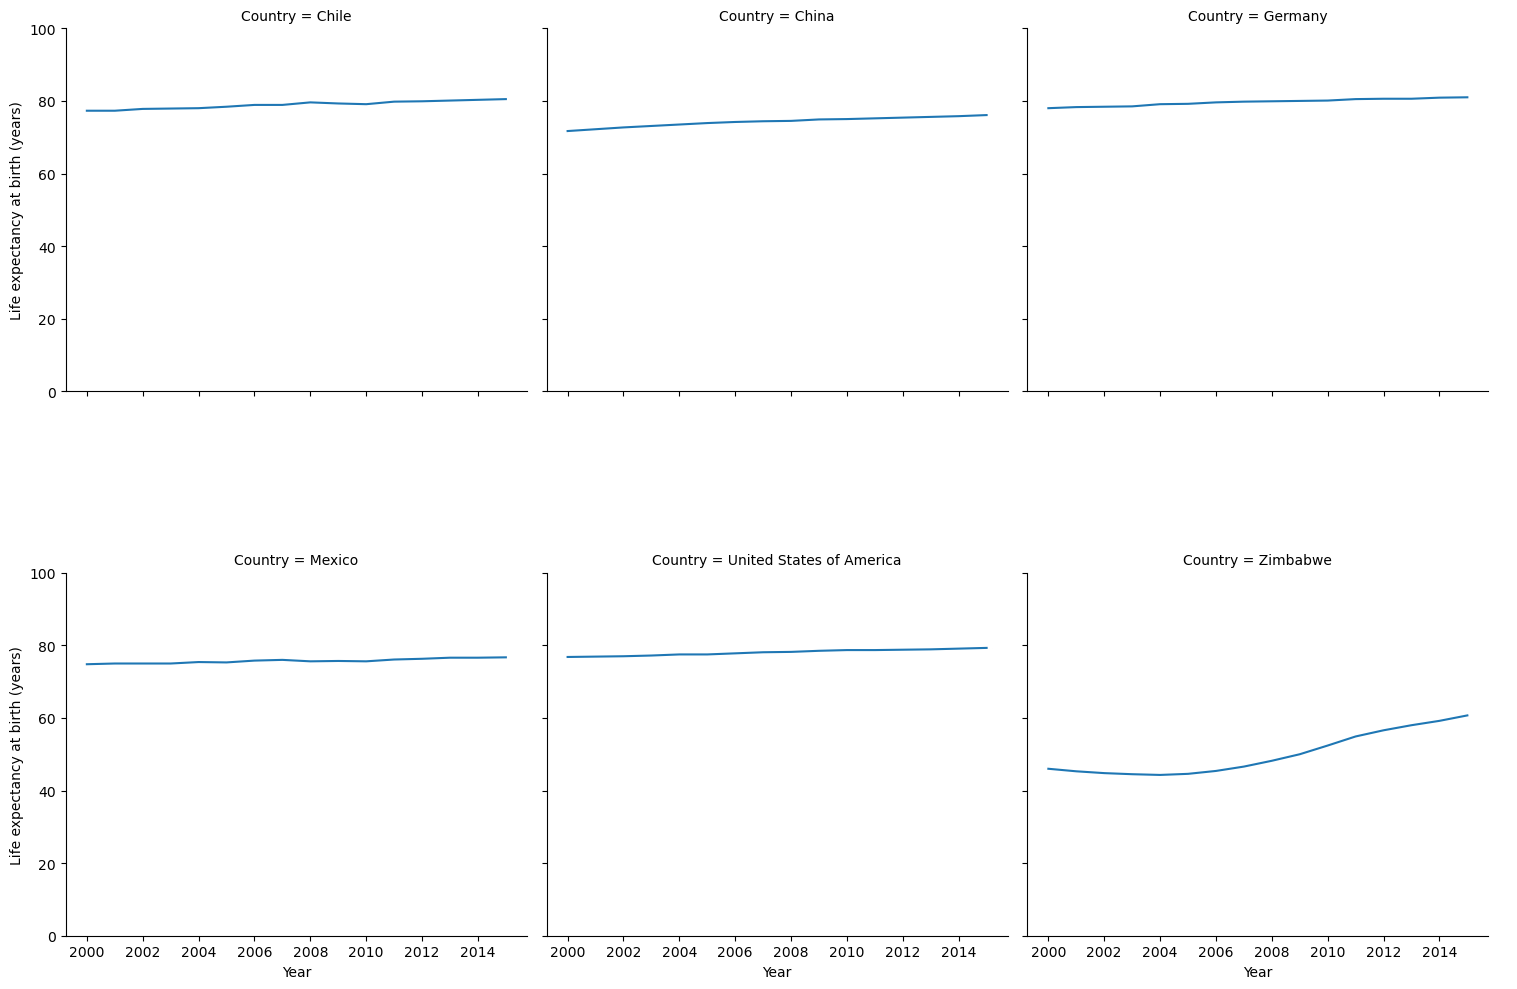

In [5]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=5)
g.map(sns.lineplot, 'Year', 'Life expectancy at birth (years)')
plt.ylim(0,100)
g.fig.subplots_adjust(hspace=0.5)
g.add_legend()

# GDP ~ Year
changed of each country's GDP throughout years is visualized using seaborn lineplot<br>
<br>
<b>almost all countries have experienced increase in GDP from 2000 to 2008 expect Zimbabwe which have seen a steep increase in GDP starting from 2008<b><br>
<br>
<b>all other countries expereinced a drop in GDP in 2008 and subsequeent increase in GDP afterwards<b>
<br><br>
<b>Germany, Mexico and Chile have experienced a decrease in GDP close to 2012 up until 2014, other countries have observed continous increase in GDP that strted since 2008

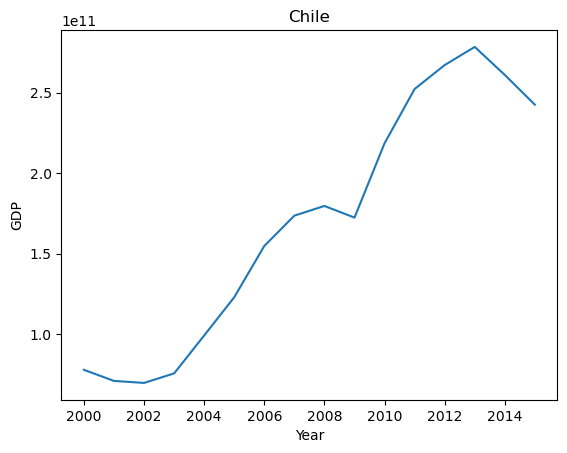

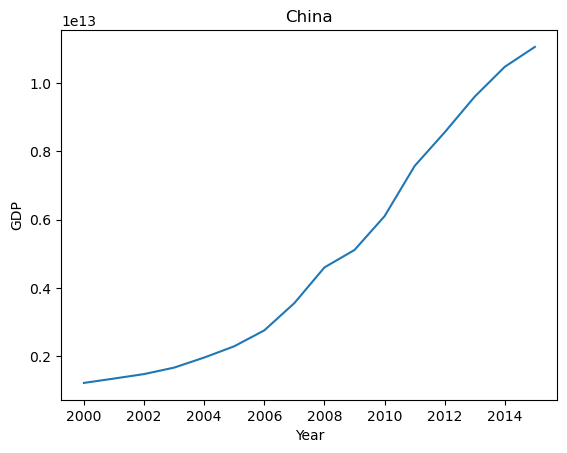

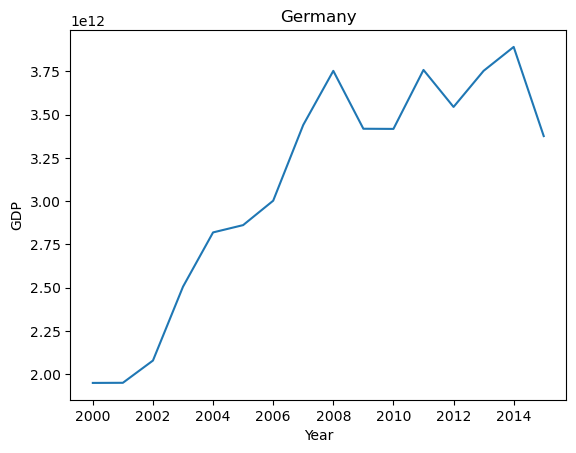

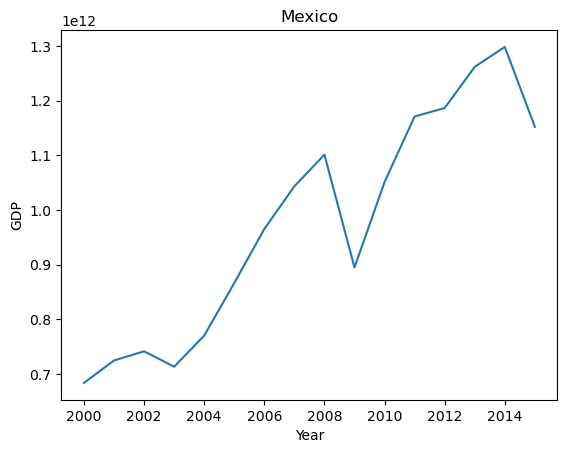

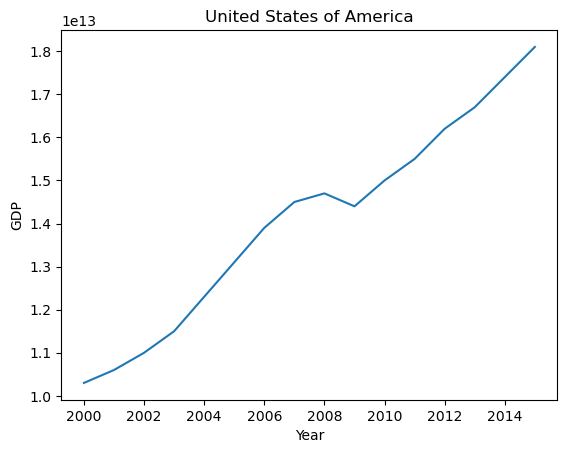

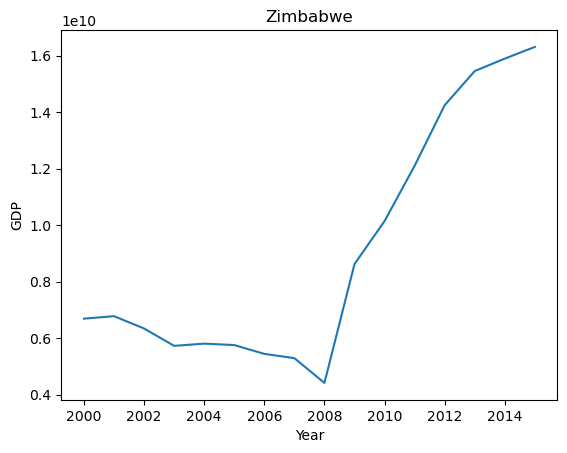

<Figure size 640x480 with 0 Axes>

In [20]:
country_list = df.Country.unique()

for i in range(len(country_list)):
    sns.lineplot(data = df[df.Country == country_list[i]] , x='Year' , y = 'GDP' , errorbar=None)
    plt.title(country_list[i])
    plt.show()
    plt.clf()

# GDP ~ Year

GDP of countries together are visalized using seaborn barplot

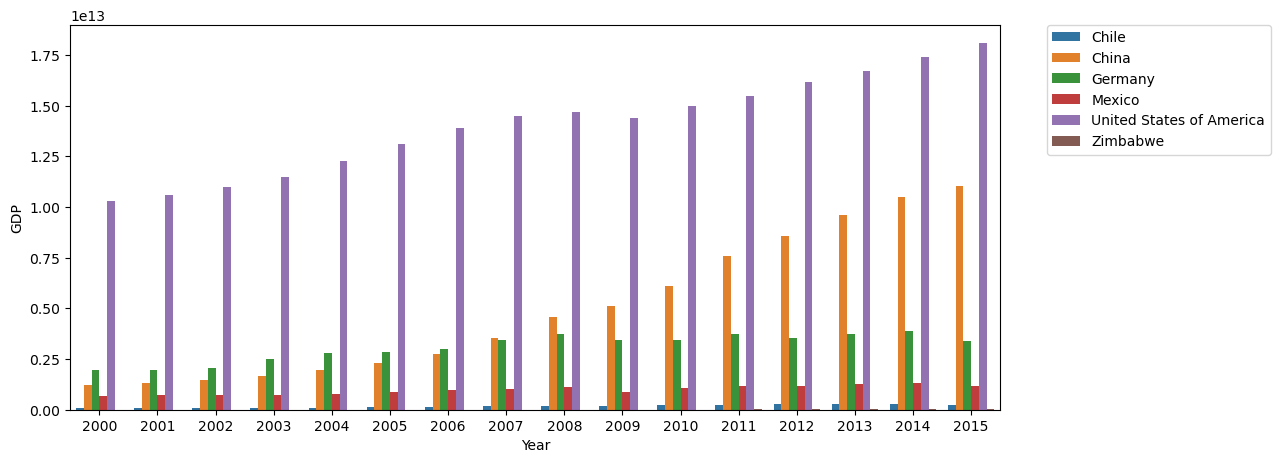

In [7]:
fig = plt.figure(figsize = (12,5))
sns.barplot(data = df, x = 'Year' , y = 'GDP' , hue= 'Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# life Expectancy ~ Year

Life Expectancy of countries together are visalized using seaborn barplot

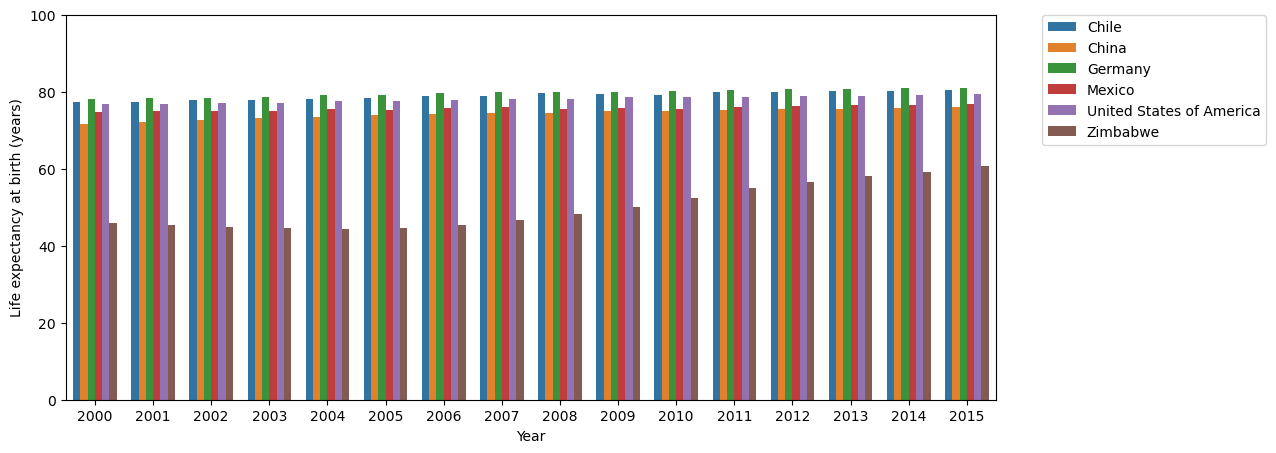

In [8]:
fig = plt.figure(figsize = (12,5))
sns.barplot(data = df, x = 'Year' , y = 'Life expectancy at birth (years)' , hue= 'Country' , width=0.75)
plt.ylim(0,100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [9]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Life Expectancy and GDP relationship

the relationship of life expectancy in years and GDP is vizualized for each country using seaborn regression plot. Additionaly, the regression model is created and printed using statsmodel Ordinary Least Square 

<b> in all countries a direct relationship is observed between life expectancy and GDP<b>

regression coefficients of Chile
Intercept    7.672234e+01
GDP          1.308337e-11
dtype: float64


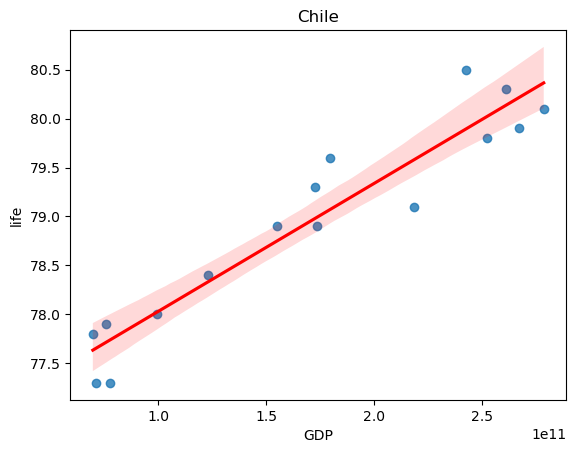

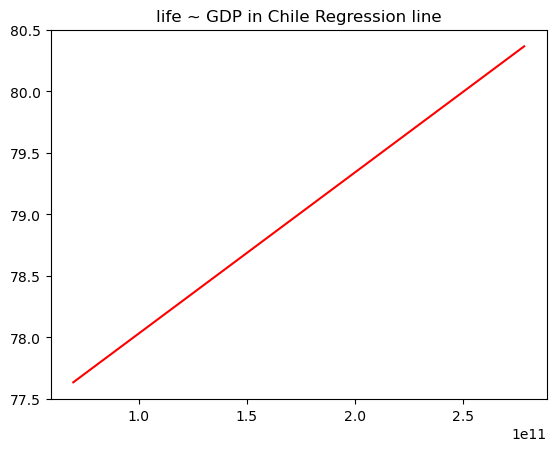

regression coefficients of China
Intercept    7.256685e+01
GDP          3.420219e-13
dtype: float64


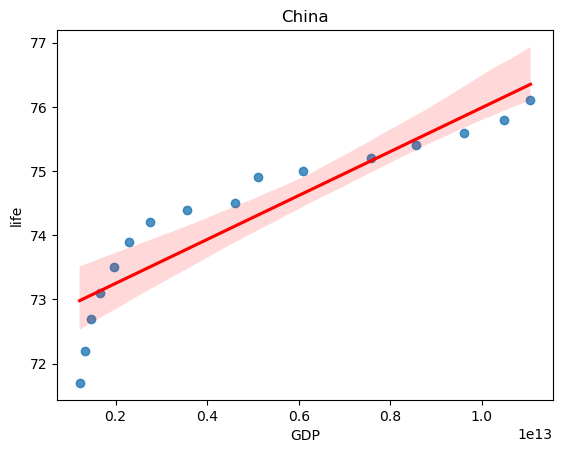

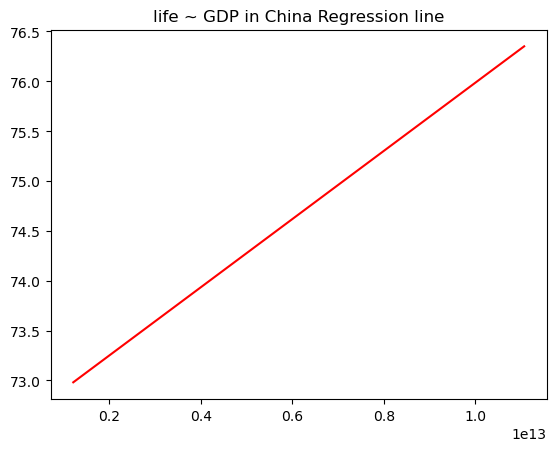

regression coefficients of Germany
Intercept    7.543994e+01
GDP          1.362397e-12
dtype: float64


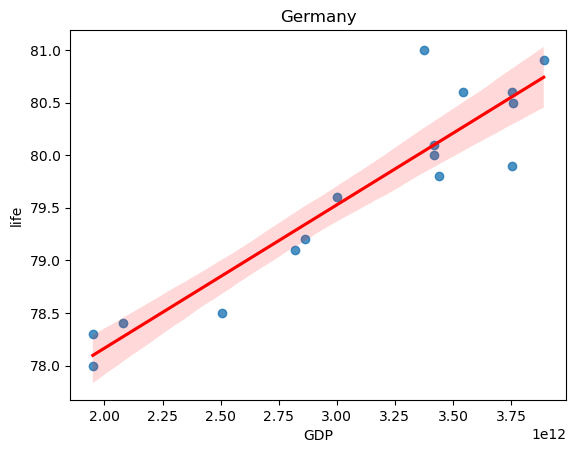

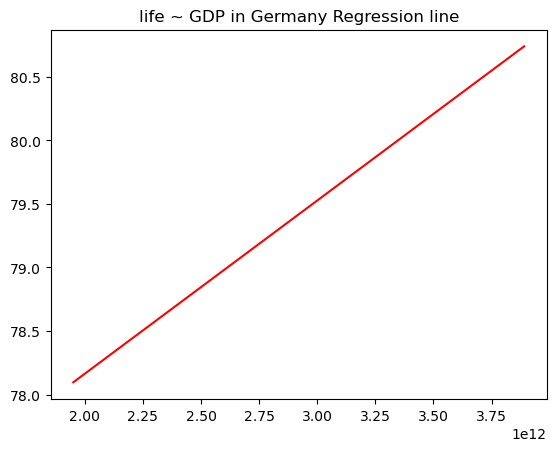

regression coefficients of Mexico
Intercept    7.302091e+01
GDP          2.762337e-12
dtype: float64


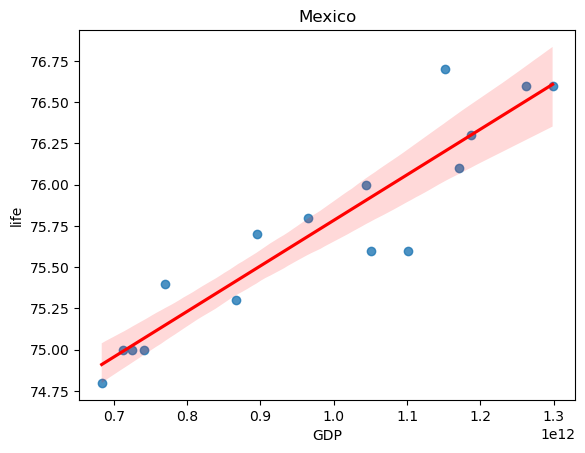

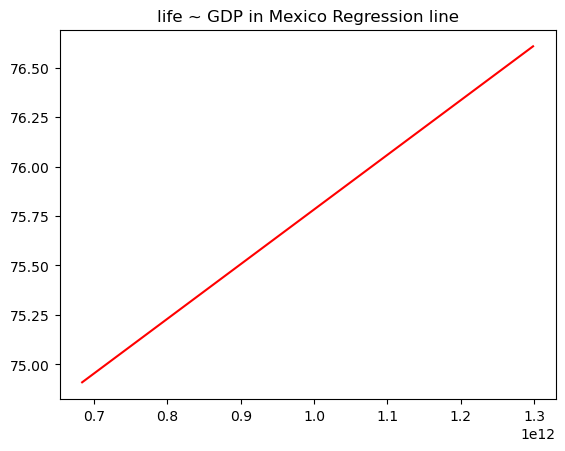

regression coefficients of United States of America
Intercept    7.333357e+01
GDP          3.359806e-13
dtype: float64


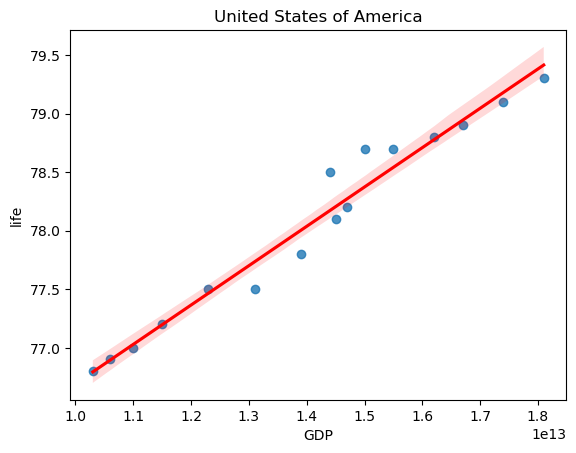

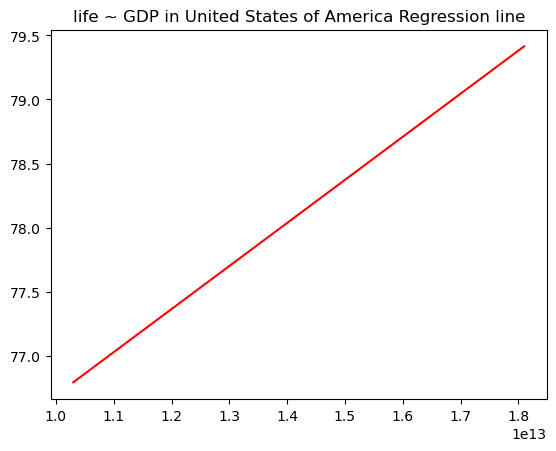

regression coefficients of Zimbabwe
Intercept    3.799250e+01
GDP          1.335299e-09
dtype: float64


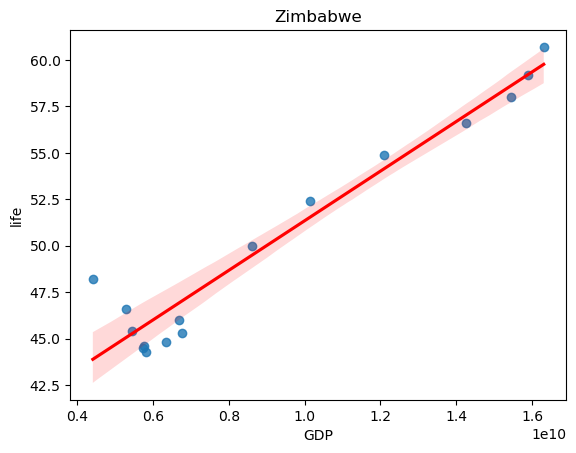

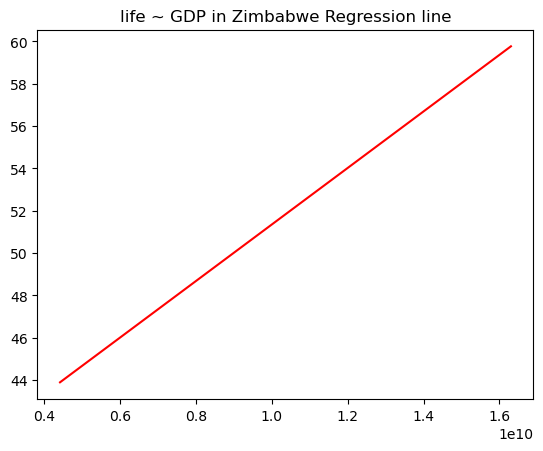

<Figure size 640x480 with 0 Axes>

In [17]:
import statsmodels.api as sm

df = df.rename(columns={'Life expectancy at birth (years)': 'life'})

for i in range(len(country_list)):
    # Create the model here:

    model = sm.OLS.from_formula('life ~ GDP', data = df[df['Country'] == country_list[i]])

    # Fit the model here:

    results = model.fit()

    # Print the coefficients here:
    print ('regression coefficients of {}'.format(country_list[i]))
    print (results.params)

    # Define the regression line
    x_values = np.linspace(df[df['Country'] == country_list[i]]['GDP'].min(), df[df['Country'] == country_list[i]]['GDP'].max(), 100)
    y_values = results.params[0] + results.params[1] * x_values

    # Plot the regression line using Matplotlib

    sns.regplot(y = 'life' , x = 'GDP' , data = df[df['Country'] == country_list[i]] , line_kws={'color': 'red'})
    plt.title("{}".format(country_list[i]))
    plt.show()
    plt.clf()


    plt.plot(x_values, y_values, color='red', label='Regression line')
    plt.title('life ~ GDP in {} Regression line'.format(country_list[i]))
    plt.show()
    plt.clf()
